In [17]:
pip install Quandl

Note: you may need to restart the kernel to use updated packages.


In [8]:
#Quandl is a website which contains database for stock mkts
import pandas as pd
import quandl
import math
df = quandl.get('WIKI/GOOGL')
df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0


In [9]:
#After Splitting , 100$ stock turns into 50$ and stock issued goes from 1000 to 2000

In [10]:
df = df[['Adj. Open','Adj. High','Adj. Low','Adj. Close','Adj. Volume',]]
# df-[High - low] percent
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Close']) / df['Adj. Close'] * 100.0
# Percentage change - [Open - Close]
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0

In [11]:
df = df[['Adj. Close','HL_PCT','PCT_change','Adj. Volume']]
df.head()

,Adj. Close,HL_PCT,PCT_change,Adj. Volume
Date,,,,
2004-08-19,50.322842,3.712563,0.324968,44659000.0
2004-08-20,54.322689,0.710922,7.227007,22834300.0
2004-08-23,54.869377,3.729433,-1.227880,18256100.0
2004-08-24,52.597363,6.417469,-5.726357,15247300.0
2004-08-25,53.164113,1.886792,1.183658,9188600.0


In [12]:
df.shape

(3424, 4)

In [13]:
forecast_col = 'Adj. Close'
# fill nan as -9999 as a n outlier
df.fillna(-9999, inplace=True)

In [14]:
forecast_out = int(math.ceil(0.01*len(df)))
df['label'] = df[forecast_col].shift(-forecast_out)
df.dropna(inplace=True)
df.head()
#Shift(-34)of forecastcol-i.e.Adj.Close
#Label is the future prediction 

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label
Date,,,,,
2004-08-19,50.322842,3.712563,0.324968,44659000.0,69.078238
2004-08-20,54.322689,0.710922,7.227007,22834300.0,67.839414
2004-08-23,54.869377,3.729433,-1.227880,18256100.0,68.912727
2004-08-24,52.597363,6.417469,-5.726357,15247300.0,70.668146
2004-08-25,53.164113,1.886792,1.183658,9188600.0,71.219849


In [15]:
len(df)

3389

In [16]:
int(math.ceil(0.01*len(df)))

34

In [17]:
# Video 4
import math
import numpy as np
from sklearn import preprocessing,svm
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression

In [18]:
X = np.array(df.drop(['label'],1))
y = np.array(df['label'])
X = preprocessing.scale(X)
y = np.array(df['label'])

from sklearn import  model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

In [19]:
clf = LinearRegression()
clf.fit(X_train,y_train)
accuracy = clf.score(X_test,y_test)
print(accuracy)

0.9758691253938091


In [20]:
#With svm model with support Vetor Regression
clf = svm.SVR(kernel='poly')
clf.fit(X_train,y_train)
accuracy = clf.score(X_test,y_test)
print(accuracy)

0.6053983884179498


In [21]:
#Video-5
#Regression Forecasting and Pediction



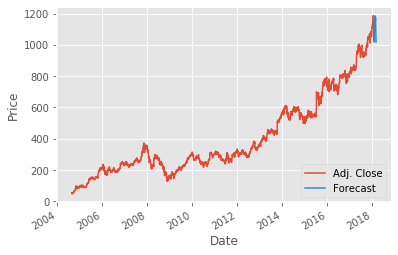

In [25]:
import quandl, math
import numpy as np
import pandas as pd
from sklearn import preprocessing,svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style
import datetime

style.use('ggplot')

df = quandl.get("WIKI/GOOGL")
df = df[['Adj. Open',  'Adj. High',  'Adj. Low',  'Adj. Close', 'Adj. Volume']]
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Low']) / df['Adj. Close'] * 100.0
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0

df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]
forecast_col = 'Adj. Close'
df.fillna(value=-99999, inplace=True)
forecast_out = int(math.ceil(0.01 * len(df)))
df['label'] = df[forecast_col].shift(-forecast_out)

X = np.array(df.drop(['label'], 1))
X = preprocessing.scale(X)
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

df.dropna(inplace=True)

y = np.array(df['label'])
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)
#Predict last 30 day data
forecast_set = clf.predict(X_lately)
df['Forecast'] = np.nan
#Setting the date for prediction
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [27]:
# Print  the last 30 day data , Not for the next 30 
print(forecast_set, accuracy, forecast_out)

[1098.24734295 1071.53561567 1018.23505908 1056.66995437 1071.8050832
 1072.37827982 1089.89325568 1108.66696637 1113.71753442 1121.12896978
 1131.01869332 1128.08891033 1146.51542965 1162.6906204  1134.82924334
 1121.27297029 1086.45057747 1100.25001644 1112.05975314 1119.95477577
 1132.75252056 1148.30029485 1178.75363019 1184.50047336 1155.98541297
 1167.48877703 1168.52245277 1151.90013847 1116.6271997  1113.16072579
 1111.75475173 1068.72855237 1041.44021357 1068.40859008 1018.80698416] 0.6053983884179498 35


In [31]:
#Video 6- Pickling and Scaling
import pickle
with open('linearregression.pickle','wb') as f:
    pickle.dump(clf, f)
    
pickle_in = open('linearregression.pickle','rb')
clf = pickle.load(pickle_in)    

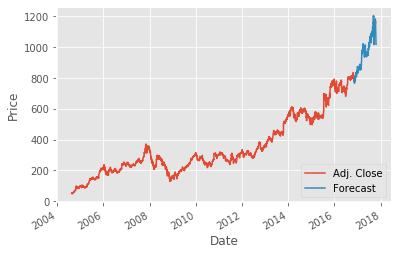

In [32]:
#Video 6 where you use pickle , that saves the data of training model in a folder and then use it when you want to acess it
# Saves trainig time


df = quandl.get("WIKI/GOOGL")
df = df[['Adj. Open',  'Adj. High',  'Adj. Low',  'Adj. Close', 'Adj. Volume']]
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Low']) / df['Adj. Close'] * 100.0
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0

df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]
forecast_col = 'Adj. Close'
df.fillna(value=-99999, inplace=True)
forecast_out = int(math.ceil(0.1 * len(df)))

df['label'] = df[forecast_col].shift(-forecast_out)

X = np.array(df.drop(['label'], 1))
X = preprocessing.scale(X)
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

df.dropna(inplace=True)

y = np.array(df['label'])
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

#COMMENTED OUT:
##clf = svm.SVR(kernel='linear')
##clf.fit(X_train, y_train)
##confidence = clf.score(X_test, y_test)
##print(confidence)
pickle_in = open('linearregression.pickle','rb')
clf = pickle.load(pickle_in)

#With pickle you don;t need to train again , that's why above # clf.fit , and model just uses previous memory
forecast_set = clf.predict(X_lately)
df['Forecast'] = np.nan

last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [33]:
print(forecast_set, accuracy, forecast_out)

[ 787.05589157  766.04348997  790.34219404  795.28074168  802.6885307
  791.35713918  801.13771897  801.4124209   794.46748469  797.57075953
  800.33317726  805.71301401  790.77733231  777.98194457  780.40368849
  794.1195662   792.14262621  806.68569096  811.4819498   825.71507209
  824.86432928  831.49914116  834.29209262  832.09014159  825.91032194
  829.01226169  832.50981327  828.75786338  827.04597267  825.17079404
  826.70313485  821.09253728  819.89061133  808.31958327  823.89936076
  824.43839393  830.00829232  840.8900632   844.12564623  843.32644227
  846.91204507  846.44802315  848.40817256  844.61198364  846.48690132
  841.3618046   845.66817071  860.22901281  866.52331434  875.55792164
  873.25294079  859.30455633  839.05933125  836.75798219  831.39358929
  834.57928503  837.21463808  838.62604177  846.13656167  846.83999738
  847.5058334   852.12798158  856.45079706  857.42002572  854.75981003
  859.80154146  863.85583749  866.83594937  868.79025547  867.99561679
  865.3